In [77]:
# importing the libraries
import numpy as np 
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Activation,Dropout,Flatten
from keras.optimizers import SGD,RMSprop
from keras.models import Sequential
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator,img_to_array
from keras.callbacks import ModelCheckpoint

In [78]:
train_gen=ImageDataGenerator(rescale=1/255,
                             rotation_range=0.1,
                             width_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2)
train_datagenerator = train_gen.flow_from_directory(path,
                                                    target_size=(224,224),
                                                    batch_size=30,
                                                    class_mode='categorical')

Found 404 images belonging to 2 classes.


In [79]:
# Initializing the parameters
path = '/content/class_10'
#batch_size = 
#epochs = 


In [80]:
# Creating Model using Pre-Trained VGG16 Net.(Not including the dense layers)
cov_base  = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224,3))


In [81]:
model = Sequential()
model.add(cov_base)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
cov_base.trainable = False
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 514       
Total params: 21,137,986
Trainable params: 6,423,298
Non-trainable params: 14,714,688
_________________________________________________________________


In [82]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [83]:
checkpoint = ModelCheckpoint('dogcatclassifier.h5',
                             monitor='loss',
                             mode='auto',
                             save_best_only=True,
                             verbose=1)
callbacks=[checkpoint]

In [84]:
history = model.fit_generator(train_datagenerator,epochs=60,verbose=1,steps_per_epoch=404//30,callbacks=callbacks)

Epoch 1/60
13/13 [==============================] - 5s 403ms/step - loss: 0.7681 - accuracy: 0.4893

Epoch 00001: loss improved from inf to 0.76486, saving model to dogcatclassifier.h5
Epoch 2/60
13/13 [==============================] - 5s 391ms/step - loss: 0.6340 - accuracy: 0.6283

Epoch 00002: loss improved from 0.76486 to 0.63829, saving model to dogcatclassifier.h5
Epoch 3/60
13/13 [==============================] - 5s 412ms/step - loss: 0.6175 - accuracy: 0.6615

Epoch 00003: loss improved from 0.63829 to 0.61754, saving model to dogcatclassifier.h5
Epoch 4/60
13/13 [==============================] - 5s 403ms/step - loss: 0.5717 - accuracy: 0.7233

Epoch 00004: loss improved from 0.61754 to 0.56920, saving model to dogcatclassifier.h5
Epoch 5/60
13/13 [==============================] - 5s 399ms/step - loss: 0.5235 - accuracy: 0.7500

Epoch 00005: loss improved from 0.56920 to 0.52589, saving model to dogcatclassifier.h5
Epoch 6/60
13/13 [==============================] - 5s 400m

In [41]:
# now evaluating the accuracy on testing set
img1='/content/download (1).jpg'
img2='/content/download (2).jpg'
img3='/content/download (3).jpg'
img4='/content/images (1).jpg'


(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


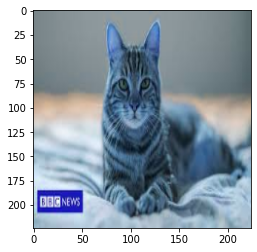

In [85]:
i1=cv2.imread(img1)
i1=cv2.resize(i1,(224,224))
im1 = img_to_array(i1)
im1 = np.expand_dims(im1,axis=0)
print(im1.shape)
i2=cv2.imread(img2)
i2=cv2.resize(i2,(224,224))
im2 = img_to_array(i2)
im2 = np.expand_dims(im2,axis=0)
print(im2.shape)
i3=cv2.imread(img3)
i3=cv2.resize(i3,(224,224))
im3 = img_to_array(i3)
im3 = np.expand_dims(im3,axis=0)
print(im3.shape)
i4=cv2.imread(img4)
i4=cv2.resize(i4,(224,224))
im4 = img_to_array(i4)
im4 = np.expand_dims(im4,axis=0)
print(im1.shape)
plt.imshow(i1)
#plt.imshow(i2)
plt.imshow(i3)
#plt.imshow(i4)
plt.show()

In [86]:
ans = np.argmax(model.predict(im3))
print(categories[ans])

cats


In [21]:
404-323

81

In [4]:
! unzip dog_cat_dataset.zip

Archive:  dog_cat_dataset.zip
   creating: class_10/cats/
  inflating: class_10/cats/cat.1.jpg  
  inflating: class_10/cats/cat.10.jpg  
  inflating: class_10/cats/cat.100.jpg  
  inflating: class_10/cats/cat.101.jpg  
  inflating: class_10/cats/cat.102.jpg  
  inflating: class_10/cats/cat.103.jpg  
  inflating: class_10/cats/cat.104.jpg  
  inflating: class_10/cats/cat.105.jpg  
  inflating: class_10/cats/cat.106.jpg  
  inflating: class_10/cats/cat.107.jpg  
  inflating: class_10/cats/cat.108.jpg  
  inflating: class_10/cats/cat.109.jpg  
  inflating: class_10/cats/cat.11.jpg  
  inflating: class_10/cats/cat.110.jpg  
  inflating: class_10/cats/cat.111.jpg  
  inflating: class_10/cats/cat.112.jpg  
  inflating: class_10/cats/cat.113.jpg  
  inflating: class_10/cats/cat.114.jpg  
  inflating: class_10/cats/cat.115.jpg  
  inflating: class_10/cats/cat.116.jpg  
  inflating: class_10/cats/cat.117.jpg  
  inflating: class_10/cats/cat.118.jpg  
  inflating: class_10/cats/cat.119.jpg  
  i